# Assignment 2
## Applied Machine Learning (BUAN 6341)

### <font color='red'>Due Date: March 14, 2019 11:59pm</font> 

Deliverables:

- Submit your answers to conceptual questions (described in another .pdf file) in a pdf file
- Write down your codes in the given cells described in this file, denoted as "YOUR CODE HERE"
- Use "download as" in the "file" menu to convert your ipython file to a .html file
- Submit three files: .pdf, .ipynb, and .html files to the eLearning


This assignment covers Supervised Learning models and model evaluation.


The total score of the implementation part is: 70

In [1]:
NAME = "Manisha Gupta"

In [2]:
%matplotlib inline 
import numpy as np
#!pip install mglearn
import pandas as pd
import sklearn
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Data Exploration

Before you start training any model, try your best to understand the information contained in the data (e.g., distributions, attributes, etc.)


Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).


The following acoustic properties of each voice are measured and included within the CSV:

- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- label: male or female


In [3]:
voice = pd.read_csv('C:\\Users\\abhin\\Downloads\\voice.csv')

In [4]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [5]:
from sklearn.model_selection import train_test_split

X = voice.iloc[:,0:19]
y = voice.iloc[:,20]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
y.describe()

count       3168
unique         2
top       female
freq        1584
Name: label, dtype: object

## Simple Models 


In [8]:
# Train a SVM model; tune the best parameters C and gamma; [10 points]
# YOUR CODE HERE

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

linear_svc = LinearSVC()


#define a list of parameters
params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc = GridSearchCV(linear_svc, params_svc, cv=5, n_jobs=2,scoring = 'roc_auc', return_train_score=True)
grid_svc.fit(X_train, y_train)

print('Linear train score: ', grid_svc.score(X_train, y_train))
print('Linear test score: ', grid_svc.score(X_train, y_train))
print(grid_svc.best_params_)

svc = SVC(probability = True)
svc_kernel = SVC(kernel = 'rbf',probability = True)

#define a list of parameters
param_svc_kernel = {'C': [1,10,100,1000,10000],'gamma':[0.001,0.001,0.1,1,10]}

#apply grid search
grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=2, scoring='roc_auc')
grid_svc_kernel.fit(X_train, y_train)

print('RBF train score: ', grid_svc_kernel.score(X_train, y_train))
print('RBF test score: ', grid_svc_kernel.score(X_train, y_train))
print(grid_svc_kernel.best_params_)

#svc_kernel = SVC(kernel = 'rbf',C= 10000, gamma= 0.001, Probability = True).fit(X_train, y_train)
#print('RBF svc train score: ', SVC.score(X_train, y_train))
#print('RBF svc test score: ', SVC.score(X_train, y_train))
y_pred = grid_svc_kernel.predict(X_test)

#print(accuracy_score(y_test, y_pred))


Linear train score:  0.9911249880388285
Linear test score:  0.9911249880388285
{'C': 1}
RBF train score:  0.9941672012276592
RBF test score:  0.9941672012276592
{'C': 10000, 'gamma': 0.001}


In [9]:
# Train a logistic regression model and a decision tree (you need to select proper parameters) [10 points]
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
logreg = LogisticRegression()

param_LGR = {"C": [0.01,0.001,0.0001],
           "max_iter": range(10,200,10)}
grid_lgr = GridSearchCV(logreg,param_LGR,cv=5)
grid_lgr.fit(X_train,y_train)
print(grid_lgr.best_params_)
print(grid_lgr.score(X_test,y_test))

print("Logisitic Training set score: {:.3f}".format(grid_lgr.score(X_train, y_train)))
print("Logistic Test set score: {:.3f}".format(grid_lgr.score(X_test, y_test)))

#print("lr.coef_:", grid_lgr.coef_)
#print("lr.intercept_:", grid_lgr.intercept_)


#X_train, X_test, y_train, y_test
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
opt_tree = DecisionTreeClassifier(random_state = 0)
param_DT = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}

grid_tree = GridSearchCV(opt_tree,param_DT,cv=5)
grid_tree.fit(X_train,y_train)
print(grid_tree.best_params_)
print(grid_tree.score(X_test,y_test))
print("Decision Tree model Accuracy on training set: {:.3f}".format(grid_tree.score(X_train, y_train)))
print("Decision Tree model Accuracy on test set: {:.3f}".format(grid_tree.score(X_test, y_test)))

{'C': 0.01, 'max_iter': 20}
0.6944444444444444
Logisitic Training set score: 0.680
Logistic Test set score: 0.694
{'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2}
0.9482323232323232
Decision Tree model Accuracy on training set: 0.955
Decision Tree model Accuracy on test set: 0.948


## Ensemble Models

In [11]:
# Train a random forest model (you need to select proper parameters) [10 points]

# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RFT = RandomForestClassifier(random_state=42)

param_RFT = {'bootstrap':[True, False], 'criterion' :['gini','entropy'],
            'max_depth' : [2,3], 'max_features' : ['auto'], 'max_leaf_nodes' : [2,3],
            'min_samples_leaf':[1,2], 'min_samples_split' : [2,3],
             'n_estimators':[50,100,150,200]}
grid_RFtree = GridSearchCV(RFT,param_RFT,cv=5)
grid_RFtree.fit(X_train,y_train)
print(grid_RFtree.best_params_)
print(grid_RFtree.score(X_test,y_test))


print("Random forest model Accuracy on training set: {:.3f}".format(grid_RFtree.score(X_train, y_train)))
print("Random forest model Accuracy on test set: {:.3f}".format(grid_RFtree.score(X_test, y_test)))
print("Random forest " , accuracy_score(y_test, y_pred))



{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.9621212121212122
Random forest model Accuracy on training set: 0.963
Random forest model Accuracy on test set: 0.962
Random forest  0.9595959595959596


In [13]:
# use voting classifier to combine the above four model [10 points]

# Voting Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(solver="liblinear", C = 0.01, max_iter = 20, random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=50, random_state=42)
svm_clf = SVC(gamma="auto", C = 10000, random_state=42, probability = True)
dt_clf = DecisionTreeClassifier(max_depth= 1, max_leaf_nodes= 2, min_samples_split= 2, random_state = 42)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('dt', dt_clf)],
    voting='soft')

# If ‘hard’, uses predicted class labels for majority rule voting. 
# Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

voting_clf.fit(X_train, y_train)


for clf in (log_clf, rnd_clf, svm_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    



    



LogisticRegression 0.6944444444444444
RandomForestClassifier 0.9823232323232324
SVC 0.9103535353535354
DecisionTreeClassifier 0.9482323232323232
VotingClassifier 0.9747474747474747


In [15]:
# apply decision tree and svm (with your optimal model parameters) with adaboost [20 points]

# YOUR CODE HERE

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)

print("adaboost Decision Tree ", accuracy_score(y_test, y_pred))

# SVM 
# ada_clf_svm = AdaBoostClassifier(
#     SVC(gamma="auto", C= 10000,probability = True), n_estimators=200,
#     algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf_svm = AdaBoostClassifier(
    SVC(gamma="auto", C= 10000, probability = True), n_estimators=100,
    algorithm="SAMME", learning_rate=0.5)

ada_clf_svm.fit(X_train, y_train)

y_svm_pred = ada_clf_svm.predict(X_test)

print("adaboost SVM ", accuracy_score(y_test, y_svm_pred))


adaboost Decision Tree  0.9810606060606061
adaboost SVM  0.9015151515151515


## Model Evaluations

[[279  94]
 [148 271]]


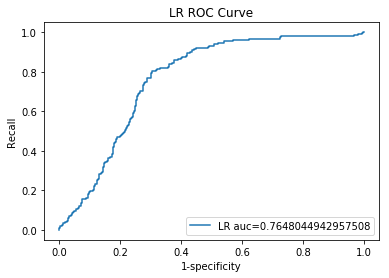

[[353  20]
 [ 21 398]]


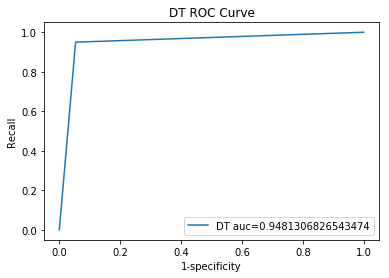

[[355  18]
 [ 12 407]]


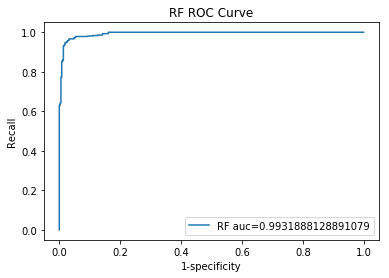

[[362  11]
 [  4 415]]


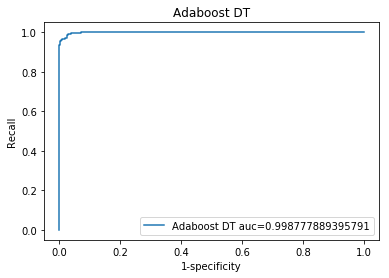

[[326  47]
 [ 31 388]]


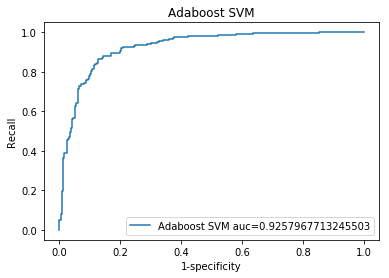

In [16]:
# Plot the roc curves of the above NINE models

# Select the proper measurements to compare the above nine models and report your decisions about the best model [10 points]

# YOUR CODE HERE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Logisitc regression 
#lr = LogisticRegression().fit(X_train, y_train)
y_pred = grid_lgr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
y_pred_proba = grid_lgr.predict_proba(X_test)[::,1]
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,  y_pred_proba, pos_label = 'male')
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_lr,tpr_lr,label="LR auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('LR ROC Curve')
plt.show()


# DT 
y_pred_d = grid_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred_d))
y_pred_proba_dt = grid_tree.predict_proba(X_test)[::,1]
fpr_lr_dt, tpr_lr_dt, threshold_lr_dt = roc_curve(y_test,  y_pred_proba_dt, pos_label = 'male')
auc = roc_auc_score(y_test, y_pred_proba_dt)
plt.plot(fpr_lr_dt,tpr_lr_dt,label="DT auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('DT ROC Curve')
plt.show()


# Random Forest
y_pred_r = grid_RFtree.predict(X_test)
print(confusion_matrix(y_test, y_pred_r))
y_pred_proba_rf = grid_RFtree.predict_proba(X_test)[::,1]
fpr_lr_rf, tpr_lr_rf, threshold_lr_rf = roc_curve(y_test,  y_pred_proba_rf, pos_label = 'male')
auc = roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr_lr_rf,tpr_lr_rf,label="RF auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('RF ROC Curve')
plt.show()


# Adaboost DT
y_pred_kr = ada_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_kr))
y_pred_proba_kr = ada_clf.predict_proba(X_test)[::,1]
fpr_lr_kr, tpr_lr_kr, threshold_lr_kr = roc_curve(y_test, y_pred_proba_kr, pos_label = 'male')
auc = roc_auc_score(y_test, y_pred_proba_kr)
plt.plot(fpr_lr_kr,tpr_lr_kr,label="Adaboost DT auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('Adaboost DT')
plt.show()


# Adaboost SVM
y_pred_kr = ada_clf_svm.predict(X_test)
print(confusion_matrix(y_test, y_pred_kr))
y_pred_proba_kr = ada_clf_svm.predict_proba(X_test)[:,1]
fpr_lr_kr, tpr_lr_kr, threshold_lr_kr = roc_curve(y_test, y_pred_proba_kr, pos_label = 'male')
auc = roc_auc_score(y_test, y_pred_proba_kr)
plt.plot(fpr_lr_kr,tpr_lr_kr,label="Adaboost SVM auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('Adaboost SVM')
plt.show()





[[360  13]
 [  7 412]]


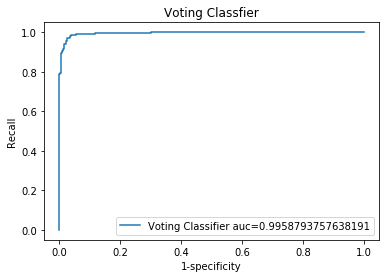

In [17]:

# Voting Classfier
y_pred_kr = voting_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_kr))
y_pred_proba_kr = voting_clf.predict_proba(X_test)[:,1]
fpr_lr_kr, tpr_lr_kr, threshold_lr_kr = roc_curve(y_test, y_pred_proba_kr, pos_label = 'male')
auc = roc_auc_score(y_test, y_pred_proba_kr)
plt.plot(fpr_lr_kr,tpr_lr_kr,label="Voting Classifier auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('Voting Classfier')
plt.show()


[[358  15]
 [ 17 402]]


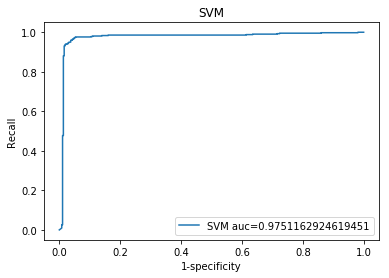

In [18]:
# SVM
y_pred_kr = grid_svc_kernel.predict(X_test)
print(confusion_matrix(y_test, y_pred_kr))
y_pred_proba_kr = grid_svc_kernel.predict_proba(X_test)[:,1]
fpr_lr_kr, tpr_lr_kr, threshold_lr_kr = roc_curve(y_test, y_pred_proba_kr, pos_label = 'male')
auc = roc_auc_score(y_test, y_pred_proba_kr)
plt.plot(fpr_lr_kr,tpr_lr_kr,label="SVM auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('SVM')
plt.show()

In [ ]:
The voting classifier slightly outperforms all the individual classifiers. After analysizing all the ROC curve , we find the AUC for adaboost Decsion tree is highest among all the model i.e. 0.9987. 
Hence we can say adaboost with Decision Tree is best model.